In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [10]:
np.random.seed(32)
tips_10 = sns.load_dataset("tips").sample(10)

In [11]:
tips_10

,total_bill,tip,sex,smoker,day,time,size
33,20.69,2.45,Female,No,Sat,Dinner,4
114,25.71,4.00,Female,No,Sun,Dinner,3
206,26.59,3.41,Male,Yes,Sat,Dinner,3
149,7.51,2.00,Male,No,Thur,Lunch,2
20,17.92,4.08,Male,No,Sat,Dinner,2
87,18.28,4.00,Male,No,Thur,Lunch,2
109,14.31,4.00,Female,Yes,Sat,Dinner,2
222,8.58,1.92,Male,Yes,Fri,Lunch,1
23,39.42,7.58,Male,No,Sat,Dinner,4
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [5]:
from numpy import NaN

In [12]:
tips_10.loc[np.random.permutation(tips_10.index)[:4], 'total_bill'] = NaN

In [13]:
tips_10

,total_bill,tip,sex,smoker,day,time,size
33,20.69,2.45,Female,No,Sat,Dinner,4
114,25.71,4.00,Female,No,Sun,Dinner,3
206,NaN,3.41,Male,Yes,Sat,Dinner,3
149,NaN,2.00,Male,No,Thur,Lunch,2
20,17.92,4.08,Male,No,Sat,Dinner,2
87,18.28,4.00,Male,No,Thur,Lunch,2
109,14.31,4.00,Female,Yes,Sat,Dinner,2
222,NaN,1.92,Male,Yes,Fri,Lunch,1
23,NaN,7.58,Male,No,Sat,Dinner,4
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [14]:
count_sex = tips_10.groupby('sex').count()
count_sex

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,3,7,7,7,7,7
Female,3,3,3,3,3,3


In [15]:
def fill_na_mean(X):
    avg = X.mean()
    return X.fillna(avg)

In [16]:
total_bill_group_mean = tips_10.groupby('sex').total_bill.transform(fill_na_mean)

In [17]:
tips_10['fill_total_bill'] = total_bill_group_mean

In [18]:
tips_10

,total_bill,tip,sex,smoker,day,time,size,fill_total_bill
33,20.69,2.45,Female,No,Sat,Dinner,4,20.690000
114,25.71,4.00,Female,No,Sun,Dinner,3,25.710000
206,NaN,3.41,Male,Yes,Sat,Dinner,3,19.766667
149,NaN,2.00,Male,No,Thur,Lunch,2,19.766667
20,17.92,4.08,Male,No,Sat,Dinner,2,17.920000
87,18.28,4.00,Male,No,Thur,Lunch,2,18.280000
109,14.31,4.00,Female,Yes,Sat,Dinner,2,14.310000
222,NaN,1.92,Male,Yes,Fri,Lunch,1,19.766667
23,NaN,7.58,Male,No,Sat,Dinner,4,19.766667
189,23.10,4.00,Male,Yes,Sun,Dinner,3,23.100000


In [19]:
tips_10

,total_bill,tip,sex,smoker,day,time,size,fill_total_bill
33,20.69,2.45,Female,No,Sat,Dinner,4,20.690000
114,25.71,4.00,Female,No,Sun,Dinner,3,25.710000
206,NaN,3.41,Male,Yes,Sat,Dinner,3,19.766667
149,NaN,2.00,Male,No,Thur,Lunch,2,19.766667
20,17.92,4.08,Male,No,Sat,Dinner,2,17.920000
87,18.28,4.00,Male,No,Thur,Lunch,2,18.280000
109,14.31,4.00,Female,Yes,Sat,Dinner,2,14.310000
222,NaN,1.92,Male,Yes,Fri,Lunch,1,19.766667
23,NaN,7.58,Male,No,Sat,Dinner,4,19.766667
189,23.10,4.00,Male,Yes,Sun,Dinner,3,23.100000


### 데이터 필터링
> filter 메서드 ( p. 230 )

In [21]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [22]:
tips.shape

(244, 7)

In [23]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [24]:
tips['size'].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

<Axes: xlabel='size', ylabel='Count'>

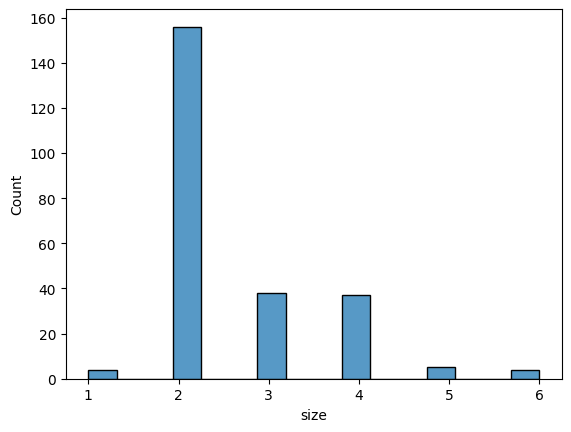

In [30]:
sns.histplot(x='size', data=tips)